#### 第５章　次元削減でデータ圧縮
主成分分析による`教師なし次元削減`

In [42]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 1-13列目をXに、1列目をyに格納
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) # 訓練データの標準化
X_test_std = sc.transform(X_test) # テストデータの標準化


####  主成分分析
ここから主成分分析に入っていく。主成分分析は、高次元データにおいて、`データの分散が最大となる方向`を見つけ出し、その方向にデータを射影することで、データの次元を削減する手法である。1つめの主成分は最大の分散を持ち、２つ目の主成分は1つ目の主成分と直交し、最大の分散を持つ方向を見つけ出す。これを繰り返していくことで、データの次元を削減することができる。分散が最大になる方向を見つけるのは、より多くの情報を保持することができるからである。このような手法を`教師なし次元削減`と呼ぶ。

これを見つけるには、`共分散行列`を作成する必要がある。共分散行列は、全通りの特徴量の組み合わせで共分散を作成した行列である。１３個の特徴量であれば13x13の行列になる。

この共分散行列の固有ベクトルと固有値を求める。固有ベクトルは、その行列が表す線形変換において、方向を変えずに拡大または縮小される方向を表す。つまり、固有ベクトルはデータをよく表す方向を表す。この固有ベクトルに対してデータを射影することで、データがその方向にどれだけ広がっているかがわかる。`固有値が大きいほど、その方向にデータが広がっている`ことを意味する。この固有ベクトルと固有値を求めることで、`データの分散が最大となる方向`を見つけることができる。

一般に主成分分析では、固有値が大きいものが主成分として選ばれることが多い。

In [44]:
import numpy as np
cov_mat = np.cov(X_train_std.T) # 共分散行列 .Tは転置 転置は行列の行と列を入れ替える
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) # 固有値と固有ベクトルを計算
print('\nEigenvalues \n%s' % eigen_vals)
print('\nEigenvectors \n%s' % eigen_vecs)


Eigenvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]

Eigenvectors 
[[ 1.46698114e-01 -5.04170789e-01  1.17235150e-01 -2.06254611e-01
   1.87815947e-01  1.48851318e-01 -1.79263662e-01 -5.54687162e-02
  -4.03054922e-01 -4.17197583e-01  2.75660860e-01  4.03567189e-01
   4.13320786e-04]
 [-2.42245536e-01 -2.42168894e-01 -1.49946576e-01 -1.30489298e-01
  -5.68639776e-01  2.69052764e-01 -5.92636731e-01  3.32731614e-02
  -1.01833706e-01  2.17101488e-01 -8.13845005e-02 -1.52474999e-01
  -8.78560762e-02]
 [-2.99344215e-02 -2.86984836e-01 -6.56394387e-01 -1.51536318e-02
   2.99209426e-01  9.33386061e-02  6.07334578e-02 -1.00618575e-01
   3.51841423e-01  1.28549846e-01 -1.29751275e-02  1.68376064e-01
  -4.52518598e-01]
 [-2.55190023e-01  6.46871827e-02 -5.84282337e-01  9.04220851e-02
   4.12499478e-02  1.01342392e-01  2.50323869e-01  5.61658566e-02
  -5.00457282e-01  4.73344124e-02  9.8908

次に固有値の分散説明率をプロットする。固有値の分散説明率は、その固有値が全体の固有値の和に占める割合である。この固有値の分散説明率をプロットすることで、どの程度の次元削減が可能かを見ることができる。固有値の分散説明率が90%を超える次元数を見つけることで、データを90%の情報を保持したまま次元削減することができる。

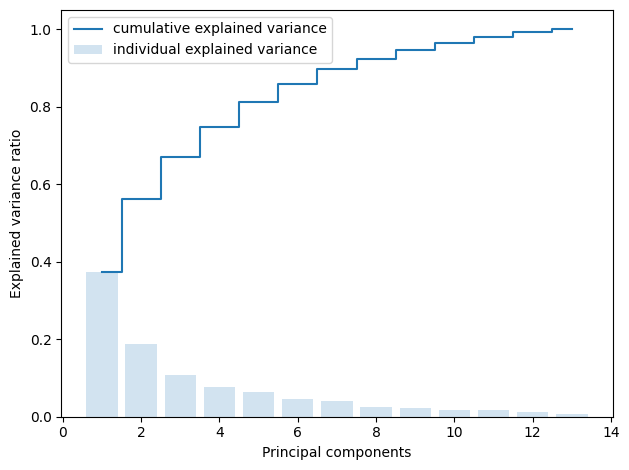

In [45]:
tot = sum(eigen_vals) # 固有値を合計
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)] # 固有値を降順に並べ、それぞれの固有値を合計値で割る
# 分散説明率の累積和をcumsumメソッドで計算
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.2, align='center', label='individual explained variance') # alphaは透明度,取りうる値は0.0～1.0
# 分散説明率の累積和をプロット
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


上のグラフより、主成分を大きいほうから並べて2つ目までで約60%の情報を保持することができることがわかる。ここからは実際に、wineデータセットを新しい主成分軸に変換する。

In [46]:
# (固有値, 固有ベクトル)のタプルリストを作成する
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# (固有値, 固有ベクトル)のタプルを固有値の大きい順に並べる
eigen_pairs.sort(reverse=True)
#print(eigen_pairs)
print(eigen_pairs[0][1])
# 上位2つの固有ベクトルを抽出
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
#hstackは横方向に結合する, np.newaxisは次元を増やす
print('Matrix W:\n', w)

[ 0.14669811 -0.24224554 -0.02993442 -0.25519002  0.12079772  0.38934455
  0.42326486 -0.30634956  0.30572219 -0.09869191  0.30032535  0.36821154
  0.29259713]
Matrix W:
 [[ 0.14669811 -0.50417079]
 [-0.24224554 -0.24216889]
 [-0.02993442 -0.28698484]
 [-0.25519002  0.06468718]
 [ 0.12079772 -0.22995385]
 [ 0.38934455 -0.09363991]
 [ 0.42326486 -0.01088622]
 [-0.30634956 -0.01870216]
 [ 0.30572219 -0.03040352]
 [-0.09869191 -0.54527081]
 [ 0.30032535  0.27924322]
 [ 0.36821154  0.174365  ]
 [ 0.29259713 -0.36315461]]


以上の操作によって、上位２つの固有ベクトルから13x2の射影行列Wが生成された。この射影行列を使って、元のデータセットを新しい主成分軸に変換する。

In [47]:
X_train_pca = X_train_std.dot(w) # データを新しい特徴部分空間に射影
print(X_train_pca)


[[ 2.59891628 -0.00484089]
 [ 0.15819134  2.26659577]
 [-2.6372337  -2.66488569]
 [-2.52848449 -0.51846618]
 [ 1.70922581  0.91719459]
 [-2.83057003 -0.41936129]
 [-2.82251879 -1.99763147]
 [ 1.36618015 -0.04639099]
 [-2.46584868  0.07932269]
 [-2.28554906  0.40096658]
 [ 1.14246632  2.39587633]
 [-2.28497881  1.09274988]
 [-2.52924945 -0.6477328 ]
 [ 0.169245    1.1264982 ]
 [ 2.53088166 -1.05798498]
 [-0.71596964  2.80365836]
 [ 2.46922033  0.15871191]
 [-0.58044574  0.69290749]
 [ 0.54583852 -0.41042188]
 [ 3.5604963  -1.42561284]
 [ 1.58679826  1.51260121]
 [ 2.54872139  0.05280515]
 [-3.59338727 -0.88321901]
 [-1.60406659 -2.40373662]
 [ 1.48668426  1.40863724]
 [ 0.00830468  2.04898307]
 [-0.15646658  2.80278355]
 [-2.39863877 -2.47524175]
 [-3.13549157  0.29421321]
 [ 3.30221023 -0.40939296]
 [-3.53069904 -1.79971521]
 [-0.45566459  2.61242833]
 [-0.58840115  1.98301934]
 [-1.16637216  0.83784744]
 [ 1.03763587  1.37755233]
 [ 1.95890184  1.62578024]
 [ 2.76990407 -1.86073384]
 

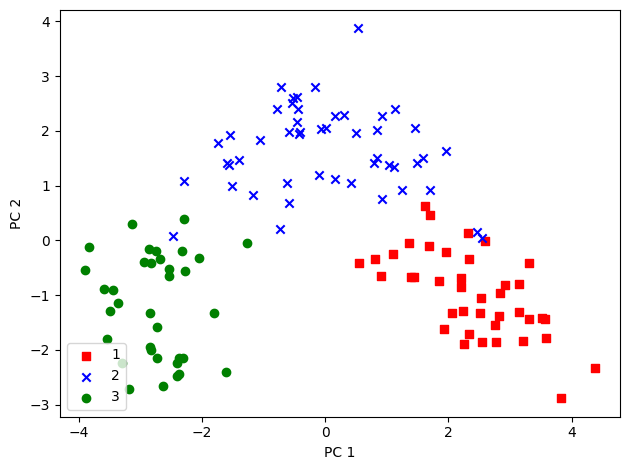

In [48]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train ==l, 0], X_train_pca[y_train ==l, 1], c=c, label = l, marker=m) #左側が条件文になっている。例えばl==1のとき、y_train==1のものを抽出している
    # y_train ==l, 0]はy_train==lのときの0列目を抽出している

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

In [50]:
import plot_decision_regions_script as pdr
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 主成分の個数を指定
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
pdr.plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


NameError: name 'np' is not defined